<a href="https://colab.research.google.com/github/eclipse1228/ML_lib/blob/main/MLP_Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# 데이터 로드
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# Train, Test Data

In [38]:
# Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in datotal.
train_data = pd.read_csv('train.csv')
print(train_data.shape)
train_data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in datotal.
# 데이터 로드
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#  label, data 분리
label = train_data['label']
data = train_data.drop('label', axis=1)

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(data, label, test_size = 0.2, random_state=42)

# 데이터 정규화 (0-255 범위를 0-1로 변환)
X_train = X_train / 255.0
X_val = X_val / 255.0

# 데이터를 텐서로 변환
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.LongTensor(y_train.values)
X_val_tensor = torch.FloatTensor(X_val.values)
y_val_tensor = torch.LongTensor(y_val.values)

# 데이터셋 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# DataLoader 생성
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# 데이터 형태 확인
print(f"학습 데이터 형태: {X_train_tensor.shape}")
print(f"검증 데이터 형태: {X_val_tensor.shape}")


학습 데이터 형태: torch.Size([33600, 784])
검증 데이터 형태: torch.Size([8400, 784])


torch.Size([784])


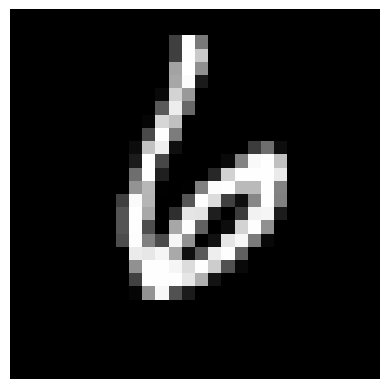

In [40]:
# 샘플 이미지 시각화
import matplotlib.pyplot as plt

print(X_train_tensor[0].shape)
sample_img = X_train_tensor[0]
plt.imshow(sample_img.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()
# plt.imshow(sample_img.shape)

# Multi Layer perceptron 모델

In [41]:
class MLP (nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(in_features=784, out_features=128)
    self.fc2 = nn.Linear(in_features=128, out_features=64)
    self.fc3 = nn.Linear(in_features=64, out_features=10)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = x.view(-1, 28*28)
    y = self.relu(self.fc1(x))
    y = self.relu(self.fc2(y))
    y = self.fc3(y)
    return y


# Hyper-parameters 지정

In [42]:
batch_size =100
learning_rate = 0.1
training_epochs = 10
loss_function = nn.CrossEntropyLoss()
network = MLP()
optimizer = torch.optim.SGD(network.parameters(), lr= learning_rate)


Perceptron 학습을 위한 반복문

In [43]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(train_loader)

  for img, label in train_loader:
    # 순전파
    pred = network(img)
    loss = loss_function(pred, label)
    # 역전파 및 최적화
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print("learning finished")

Epoch: 1 Loss = 0.675982
Epoch: 2 Loss = 0.256239
Epoch: 3 Loss = 0.183214
Epoch: 4 Loss = 0.142480
Epoch: 5 Loss = 0.114724
Epoch: 6 Loss = 0.094644
Epoch: 7 Loss = 0.079234
Epoch: 8 Loss = 0.067000
Epoch: 9 Loss = 0.056738
Epoch: 10 Loss = 0.048242
learning finished


# 모델로 정답률 확인

In [44]:
network.eval() # 평가 모드
with torch.no_grad():

  img_test, label_test = train_dataset[:]  # 전체 데이터셋 가져오기
  prediction = network(img_test)

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy: %2f' % accuracy)


Accuracy: 0.985833


# 모델 저장 & 제출

In [46]:
network.eval()

test_data = pd.read_csv('test.csv')
test_tensor = torch.FloatTensor(test_data.values) / 255.0

with torch.no_grad():
    prediction = network(test_tensor)
    _, predicted_classes = torch.max(prediction, 1)

print(predicted_classes)

# 결과를 Kaggle 제출 형식으로 저장
submission = pd.DataFrame({"ImageId": range(1, len(predicted_classes) + 1), "Label": predicted_classes.numpy()})
submission.to_csv('submission.csv', index=False)


tensor([2, 0, 9,  ..., 3, 9, 2])
